In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych

In [45]:
stroke_df = pd.read_csv('stroke_clean.csv')

stroke_df["age_group_13"]=[1.0 if i<30 else 
                           2.0 if (i>=30)&(i<34) else 
                           3.0 if (i>=34)&(i<39) else 
                           4.0 if (i>=39)&(i<44) else 
                           5.0 if (i>=44)&(i<49) else 
                           6.0 if (i>=49)&(i<54) else 
                           7.0 if (i>=54)&(i<59) else 
                           8.0 if (i>=59)&(i<64) else 
                           9.0 if (i>=64)&(i<69) else 
                           10.0 if (i>=69)&(i<74) else 
                           11.0 if (i>=74)&(i<79) else 
                           12.0 if (i>=79)&(i<84) else 
                           13.0 for i in stroke_df['age']]

stroke_df["age_group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                                '45 to 59 years' if (i>=45)&(i<59) else '60 and over' for i in stroke_df['age']]

stroke_df.pop('age')
stroke_df.head()

,sex,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_13,age_group
0,1.0,0,1,1,4,1,228.69,36.6,1,1,8.0,60 and over
1,1.0,0,1,1,4,0,105.92,32.5,0,1,4.0,30 to 44 years
2,0.0,0,0,1,4,1,171.23,34.4,1,1,8.0,60 and over
3,1.0,1,0,1,3,0,174.12,24.0,0,1,4.0,30 to 44 years
4,1.0,0,0,1,4,1,186.21,29.0,1,1,13.0,60 and over


In [46]:
stroke_df.shape

(40754, 12)

In [47]:
# Podział kolumn na numeryczne i binarne
stroke_binary_features = [col for col in stroke_df if np.isin(stroke_df[col].dropna().unique(), [0, 1]).all()]
stroke_numerical_features = list(stroke_df.drop(stroke_binary_features, axis=1).columns)

In [48]:
stroke_binary_features

['sex',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'smoking_status',
 'stroke']

In [49]:
stroke_numerical_features

['work_type', 'avg_glucose_level', 'bmi', 'age_group_13', 'age_group']

# Podstawowe informacje

In [50]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40754 entries, 0 to 40753
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40754 non-null  float64
 1   hypertension       40754 non-null  int64  
 2   heart_disease      40754 non-null  int64  
 3   ever_married       40754 non-null  int64  
 4   work_type          40754 non-null  int64  
 5   Residence_type     40754 non-null  int64  
 6   avg_glucose_level  40754 non-null  float64
 7   bmi                40754 non-null  float64
 8   smoking_status     40754 non-null  int64  
 9   stroke             40754 non-null  int64  
 10  age_group_13       40754 non-null  float64
 11  age_group          40754 non-null  object 
dtypes: float64(4), int64(7), object(1)
memory usage: 3.7+ MB


In [51]:
stroke_df.describe()

,sex,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_13
count,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000,40754.000000
mean,0.555160,0.214065,0.128208,0.822913,3.467733,0.514453,122.139355,30.349850,0.489891,0.502037,6.259974
std,0.496954,0.410177,0.334326,0.381747,0.765936,0.499797,57.600706,6.662381,0.499904,0.500002,3.880615
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,11.500000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.782500,25.900000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.960000,29.400000,0.000000,1.000000,6.000000
75%,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,168.150000,34.100000,1.000000,1.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,57.700000,1.000000,1.000000,13.000000


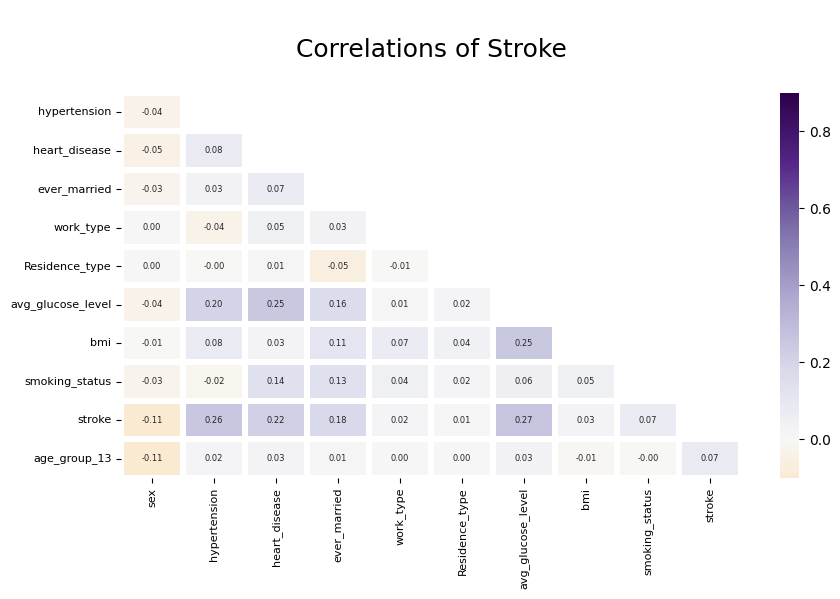

In [52]:
# Macierz korelacji
fig, ax = plt.subplots(figsize=(10,5))   

mask = np.triu(np.ones_like(stroke_df.corr(numeric_only = True), dtype=bool))[1:, :-1]
corr = stroke_df.corr(numeric_only = True).iloc[1:,:-1].copy()

ax = sns.heatmap(corr, mask=mask, vmin=-.1, vmax=.9, center=0, annot=True, fmt='.2f', 
               cmap ='PuOr', linewidths=4, annot_kws={"fontsize":6})

ax.set_title('\nCorrelations of Stroke\n', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
plt.show()

# Fiolet - wartości dodatnie, Biały - zero, Pomarańcz - wartości ujemne

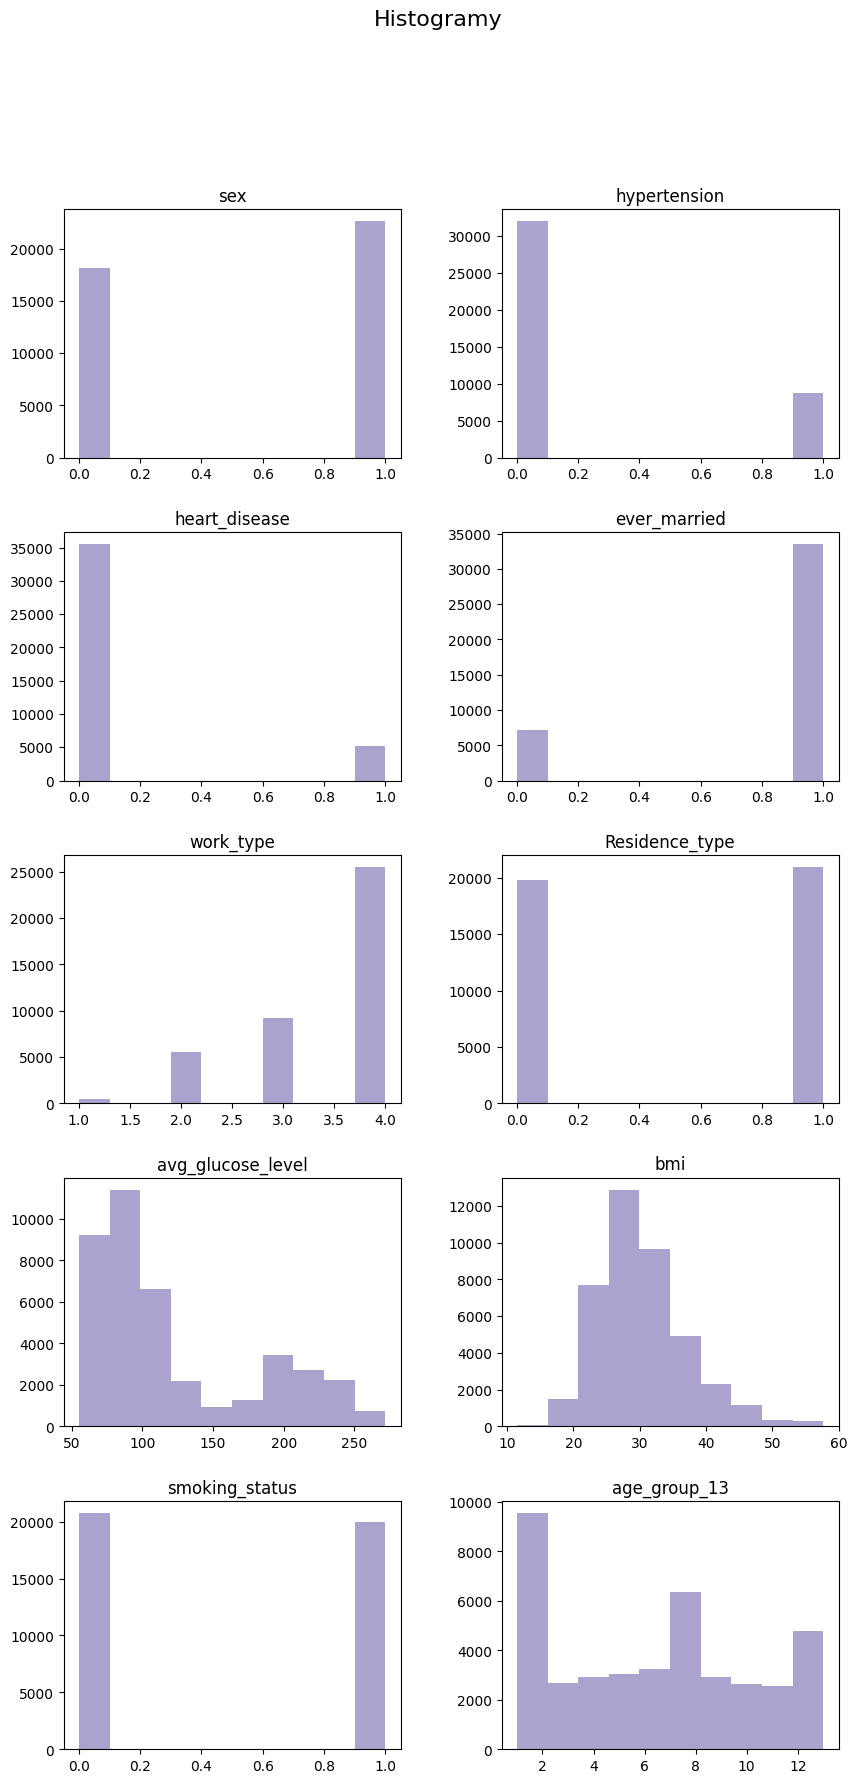

In [54]:
# Rozkład wszystkich cech
fig2, axis2 = plt.subplots(5, 2, figsize=(10,20))
fig2.suptitle('Histogramy', fontsize=16)
stroke_df.drop(['stroke', 'age_group'], axis=1).hist(grid = False, ax = axis2, color = '#aba3cd')
plt.show()

# Ciekawe wykresy

In [55]:
print(stroke_binary_features)
print(stroke_numerical_features)

['sex', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'smoking_status', 'stroke']
['work_type', 'avg_glucose_level', 'bmi', 'age_group_13', 'age_group']


In [61]:
stroke_numerical_features[:-1]

['work_type', 'avg_glucose_level', 'bmi', 'age_group_13']

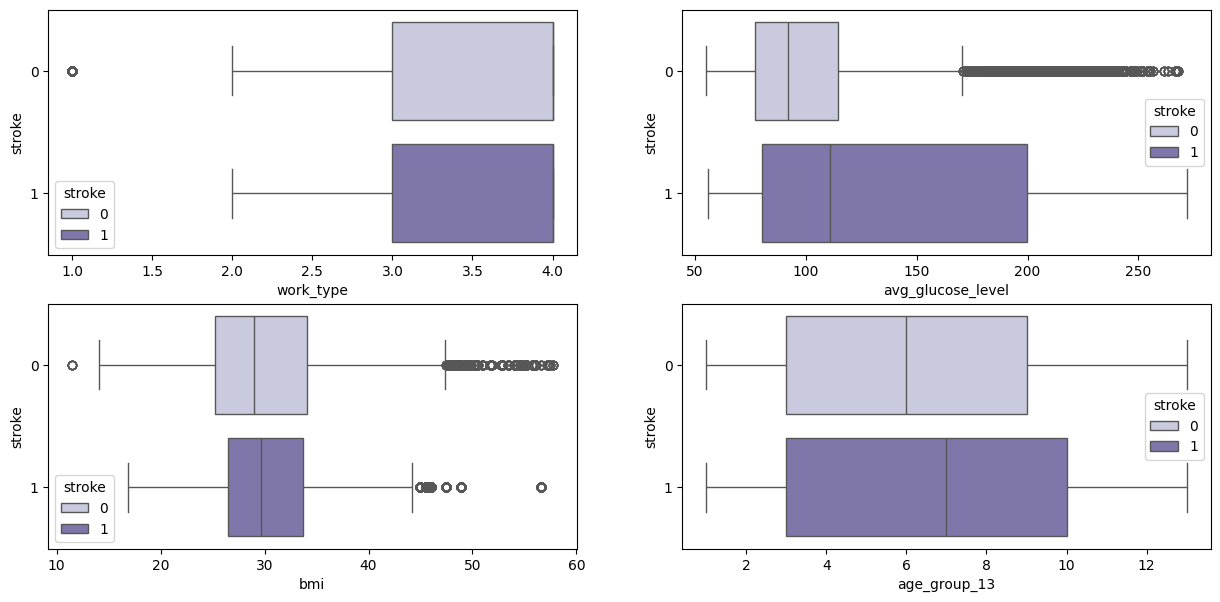

In [62]:
binary = stroke_binary_features[-1]
i = 0
fig, axes = plt.subplots(2, 2, figsize=(15,7))
axes = axes.flatten()
for feature in stroke_numerical_features[:-1]:
    sns.boxplot(x = stroke_df[feature], y = stroke_df[binary], hue = stroke_df[binary], orient="h", palette='Purples', ax=axes[i])
    i += 1
plt.show()

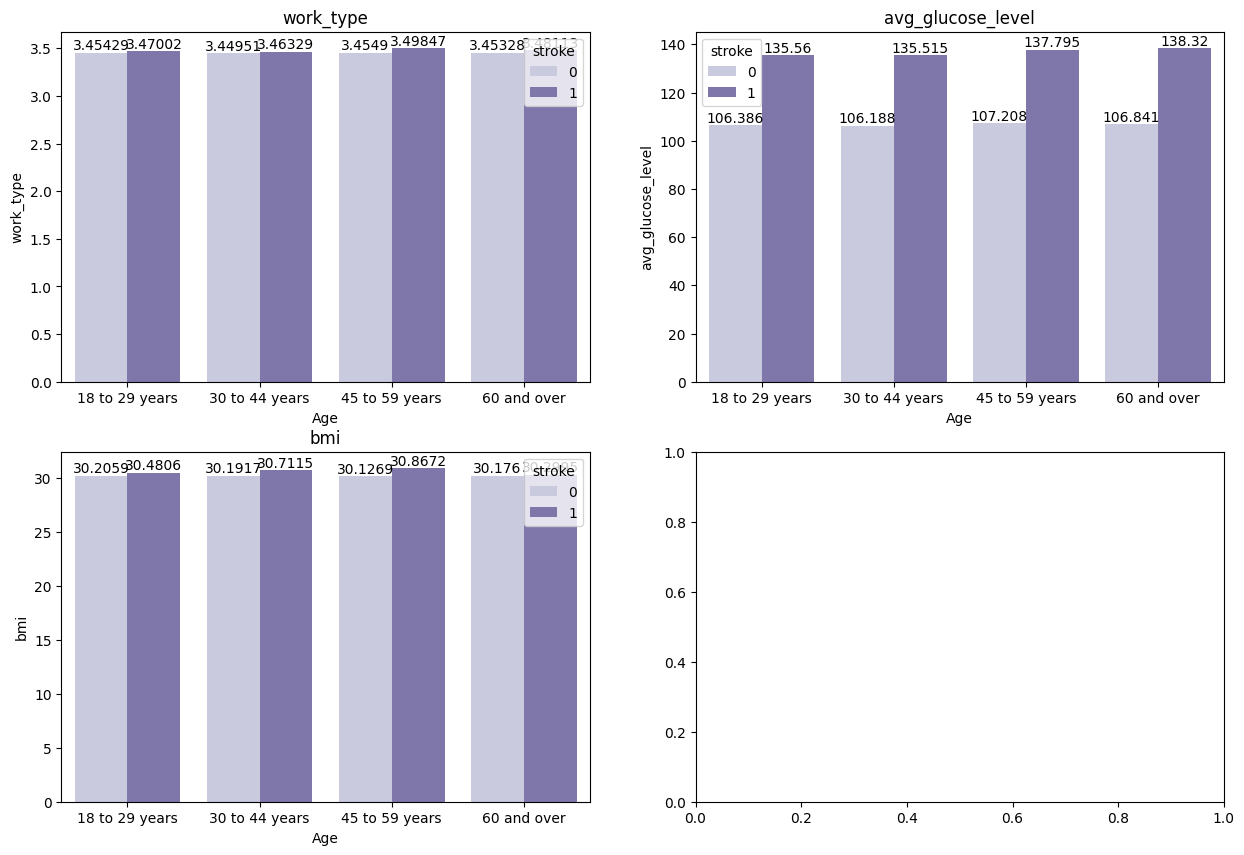

In [78]:
binary = stroke_binary_features[-1]

k = 0
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes = axes.flatten()

for feature in stroke_numerical_features[:-2]:

    plot_df = stroke_df.copy()

    plot_df["Age"]=['18 to 29 years' if i<=1 else '30 to 44 years' if (i>1)&(i<4) else 
                      '45 to 59 years' if (i>=4)&(i<8) else '60 and over' for i in stroke_df['age_group_13']]

    plot_df = plot_df.groupby(['Age', binary])[feature].mean()
    plot_df = plot_df.rename(feature).reset_index().sort_values(binary, ascending=True)

    ax = sns.barplot(x="Age", y=feature, hue = binary, palette="Purples", data=plot_df, ax=axes[k])

    for i in ax.containers:
        ax.bar_label(i,)
        
    axes[k].title.set_text(feature)
    k += 1
    
plt.show()

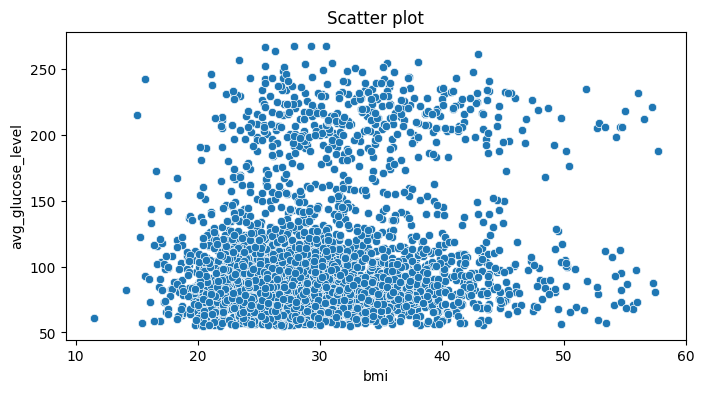

In [69]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_df[stroke_df.stroke == 0])
ax.set_title('Scatter plot')
plt.show()

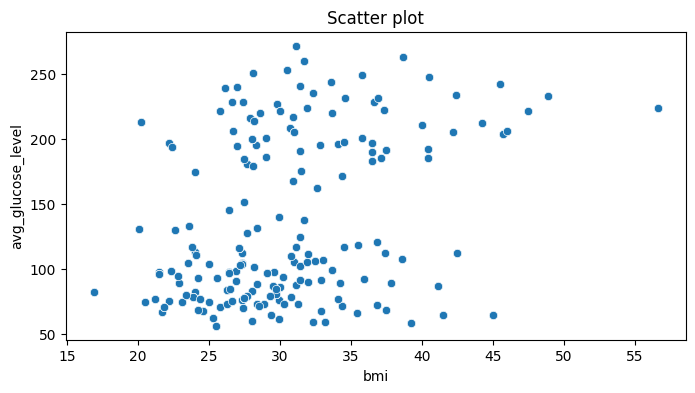

In [77]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x='bmi', y='avg_glucose_level', data=stroke_df[stroke_df.stroke == 1])
ax.set_title('Scatter plot')
plt.show()

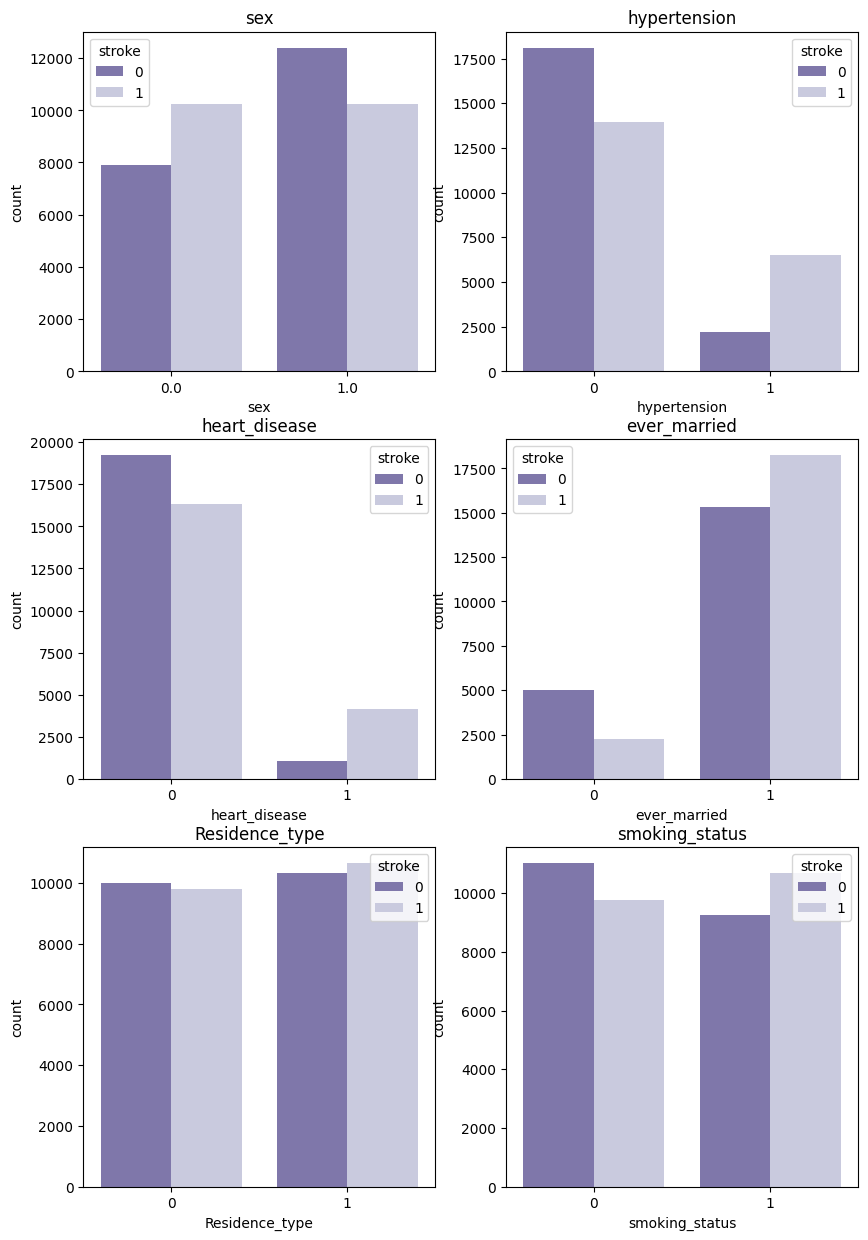

In [88]:
k = 0
fig, axes = plt.subplots(3, 2, figsize=(10,15))
axes = axes.flatten()

for feature in stroke_binary_features[:-1]:
    plt
    sns.countplot(x=feature, hue='stroke', palette="Purples_r", data=stroke_df, ax=axes[k])
    for i in ax.containers:
        ax.bar_label(i,)
        
    axes[k].title.set_text(feature)
    k += 1
    
plt.show()